# OU Fitter with Jumps

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ito_diffusions import *
from ou_fitter import *
from scipy.stats import laplace
plt.style.use('dark_background')

In [3]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [4]:
DAYS_IN_YEAR = 252
T = 8
SCHEME_STEPS = int(DAYS_IN_YEAR*T)
std_dev_weight = 1.0
n_quadrature = 15

### OU with jumps

$dX_t = \lambda(\theta_{0} - X_t)dt + \sigma{dW_t} + dJ_t$ where the jump process $J_t$ has constant Poisson intensity $m$ and jump size distribution $Laplace(\beta)$

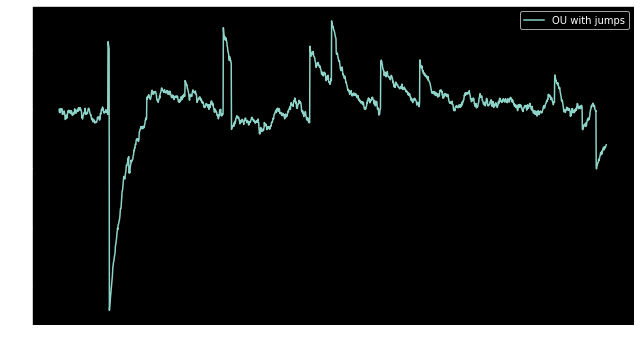

In [5]:
fig, ax = plt.subplots(figsize=(9,5), nrows=1, ncols=1)
mean_reversion = 5.0
long_term  = 0.0
vol = 0.4

jump_intensity = 2.0
jump_size_scale = 1.0
jump_size_distr = laplace(loc=0.0, scale=1/jump_size_scale)
jump_params = {
    'jump_intensity_func': lambda t,x: jump_intensity,
    'jump_size_distr': jump_size_distr,
}

OU = Vasicek(x0=0.0, T=T, scheme_steps=SCHEME_STEPS,
             vol=vol, long_term=long_term, mean_reversion=mean_reversion, jump_params=jump_params)

df = OU.simulate()
ax.plot(df, label='OU with jumps')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Estimate all parameters at once

In [6]:
fitter = OU_jump_Laplace_fitter(theta_init_mode='random', std_dev_weight=std_dev_weight, n_quadrature=n_quadrature)
fitter.df = df
fitter.regularization = 0
fitter.theta_init

[1.7745631940018953,
 -0.6848241075829891,
 0.189637006009242,
 0.5754938638582054,
 0.9664434784271304]

In [7]:
fit_info = fitter.fit()
fit_info

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.00041353798682736777
        x: [ 2.038e+00  9.627e-02  4.851e-01  7.296e-01  2.989e-01]
      nit: 35
      jac: [-7.310e-07  4.342e-05  4.814e-06  5.385e-07  1.080e-06]
     nfev: 246
     njev: 41
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

In [ ]:
print('Ground truth:')
print('mean reversion: {:.2f}'.format(OU.mean_reversion))
print('long term: {:.2f}'.format(OU.long_term))
print('vol: {:.2%}'.format(OU.vol_double))
print('intensity: {:.2f}'.format(jump_intensity))
print('jump size scale: {:.2f}'.format(jump_size_scale))

print('\nFitted:')
print('mean reversion: {:.2f}'.format(fitter.theta[0]))
print('long term: {:.2f}'.format(fitter.theta[1]))
print('vol: {:.0%}'.format(fitter.theta[2]))
print('intensity: {:.2f}'.format(fitter.theta[4]))
print('jump size scale: {:.2f}'.format(fitter.theta[3]))

print('\nRegression (diffusion only):')
print('mean reversion (annualized): {:.2f}'.format(fitter.theta_regression()[0]))
print('long term: {:.2f}'.format(fitter.theta_regression()[1]))
print('vol (annualized): {:.0%}'.format(fitter.vol_estimate()))

## Resources

* https://github.com/sauxpa/stochastic/blob/master/examples/ou_fitting_examples/ou_fit_artificial_data.ipynb